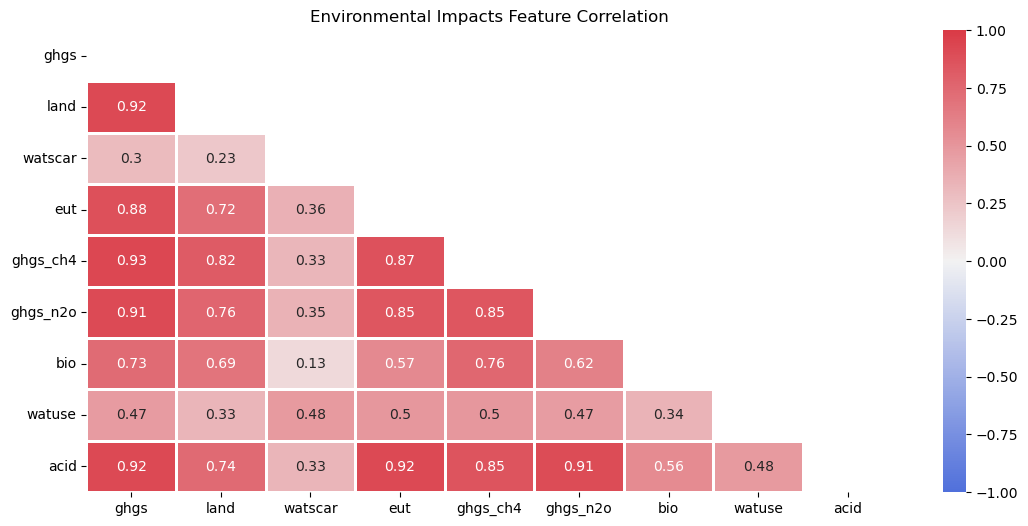

In [44]:
import matplotlib.pyplot as plt  # For creating visualizations
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import seaborn as sns  # For statistical visualizations

# Load and preprocess the dataset
# Read CSV file, selecting only the 9 specified mean value columns
all_df = pd.read_csv('Results_21Mar2022.csv',
                    usecols=['mean_ghgs', 'mean_land', 'mean_watscar', 
                            'mean_eut', 'mean_ghgs_ch4', 'mean_ghgs_n2o',
                            'mean_bio', 'mean_watuse', 'mean_acid'],
                    index_col=False)  

# Clean column names by removing 'mean_' prefix for readability
all_df.columns = [col.replace('mean_', '') for col in all_df.columns]

# Calculate correlation matrix between all features
# numeric_only=True ensures only numerical columns are considered
corrMatt = all_df.corr(numeric_only=True)

# Create mask to hide upper triangle of symmetric correlation matrix
mask = np.zeros_like(corrMatt)  # Initialize matrix of zeros with same shape
mask[np.triu_indices_from(mask)] = True  # Set upper triangle to True (will be masked)

# Initialize figure with specified dimensions (width=13in, height=6in)
fig, ax = plt.subplots(figsize=(13, 6))  

# Set plot title
plt.title('Environmental Impacts Feature Correlation')  

# Create custom diverging color palette (blue to red)
cmap = sns.diverging_palette(260, 10, as_cmap=True) 

# Generate correlation heatmap with the following parameters:
# - corrMatt: Correlation matrix to visualize
# - vmax/vmin: Set color scale range from -1.0 to 1.0
# - square: Keep cells rectangular (not forced to squares)
# - cmap: Use our custom color palette
# - mask: Hide upper triangle to avoid redundancy
# - ax: Plot on our initialized figure
# - annot: Display correlation values in each cell
# - fmt: Format annotations to 2 significant figures
# - linewidths: Add thin borders between cells
sns.heatmap(corrMatt, 
           vmax=1.0, 
           vmin=-1.0, 
           square=False, 
           cmap=cmap, 
           mask=mask, 
           ax=ax, 
           annot=True, 
           fmt='.2g', 
           linewidths=1)

# Display the plot 
plt.show()